In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
d = pd.read_csv('wine_dataset.csv')

In [4]:
df = pd.DataFrame(d)


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
np.isnan(df) # No NaN value

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


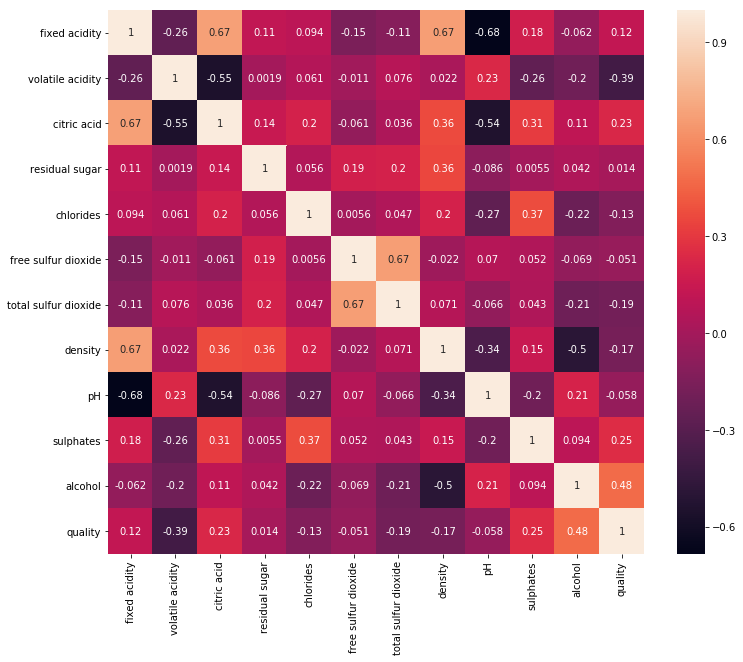

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

 Highest corr of quality is with : alcohol
 
 Least corr of quality is with : residual sugar

In [18]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

 3 has least frequency =10
 
 5 has max frequency = 681 

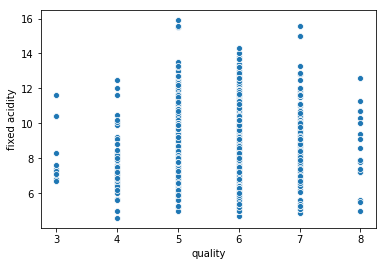

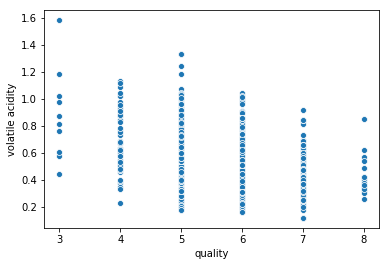

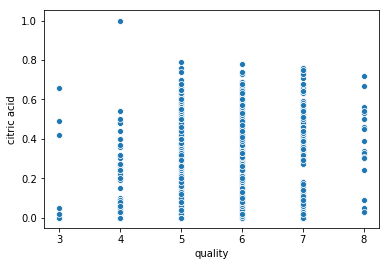

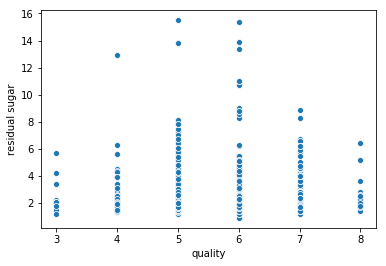

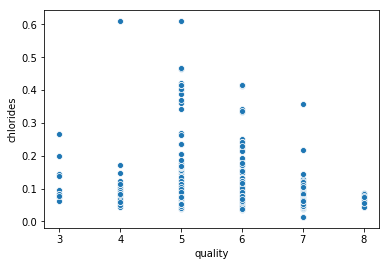

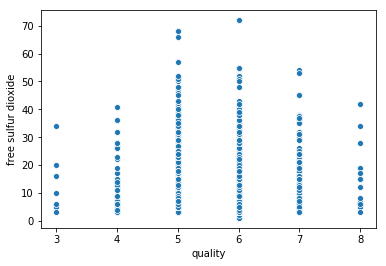

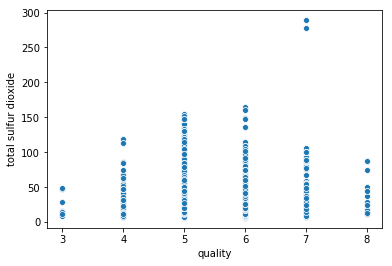

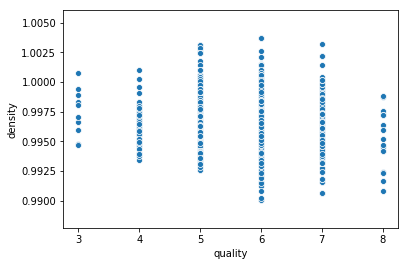

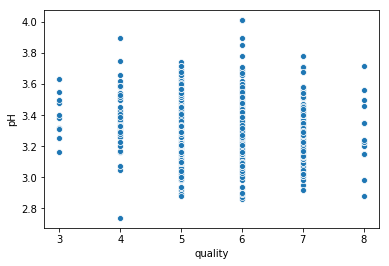

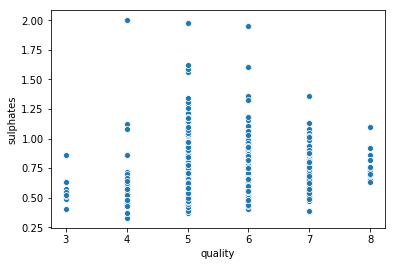

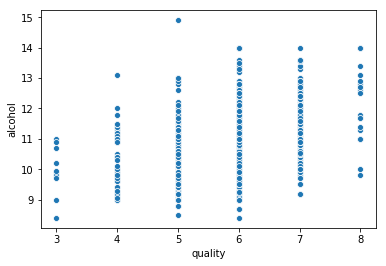

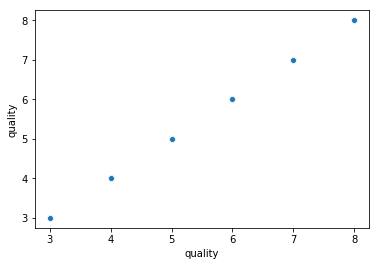

In [19]:
for i in df.columns:
    sns.scatterplot(x='quality',y=i,data=df)
    plt.show()

Each feature is distributed upto fixed point, some are not may because of outliers  

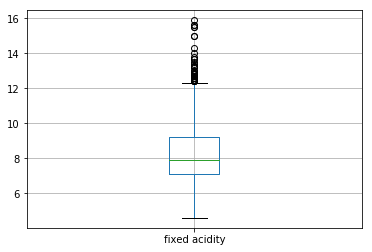

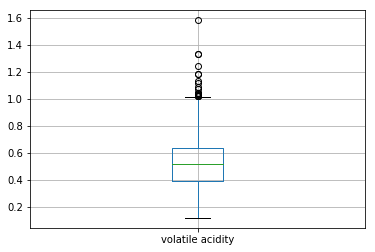

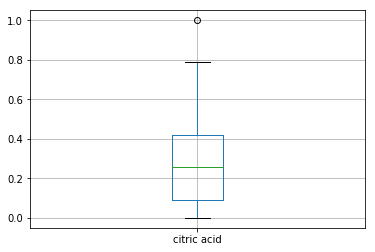

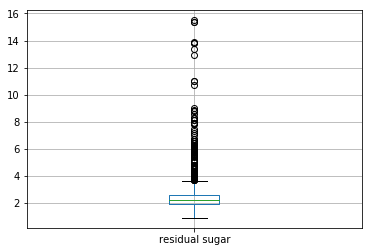

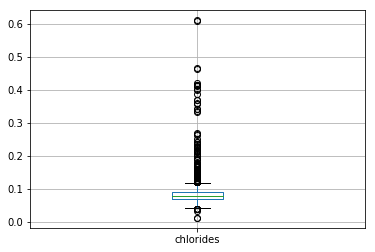

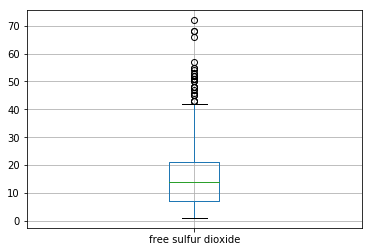

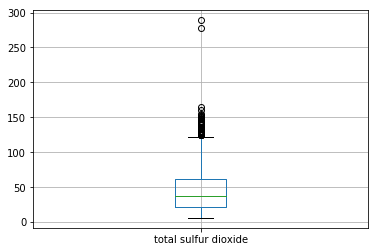

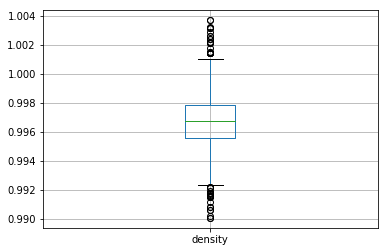

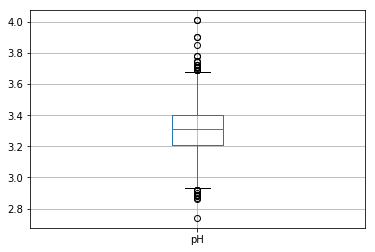

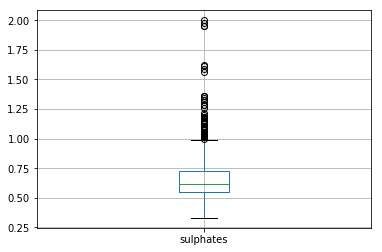

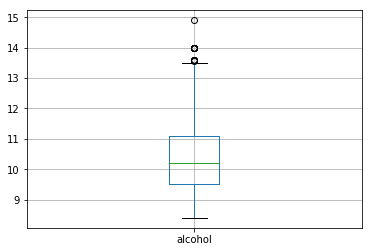

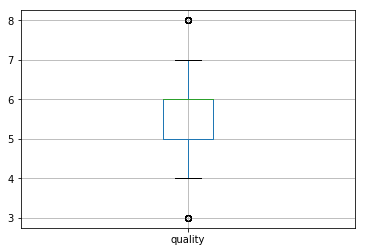

In [20]:
for i in df.columns:
    df.boxplot(i)
    plt.show()

each feature except alcohol has outliers

In [23]:
from scipy.stats import zscore
z_score=zscore(df)
df_new=df[(z_score<3).all(axis=1)]

In [24]:
df.shape

(1599, 12)

In [25]:
df_new.shape

(1463, 12)

In [28]:
percent_loss = (1599-1463)/1599*100

In [29]:
percent_loss # data loss is 8 % after removing outliers so we are keeping them

8.505315822388994

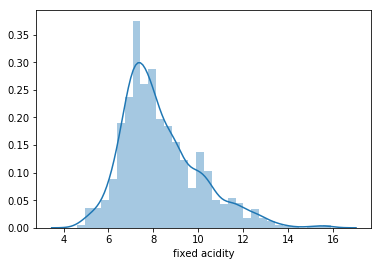

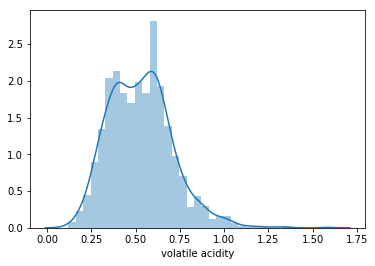

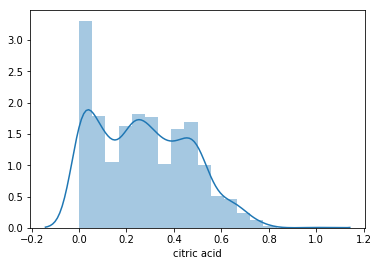

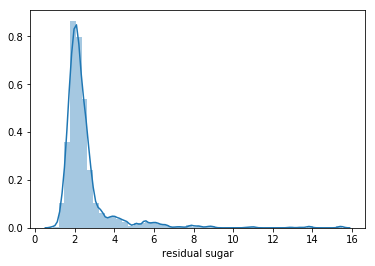

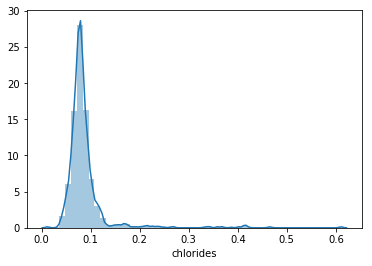

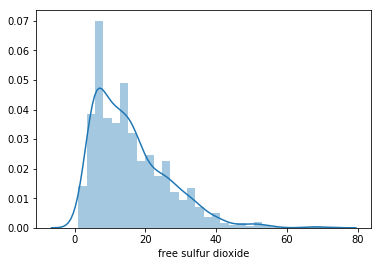

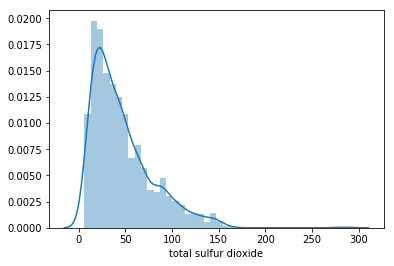

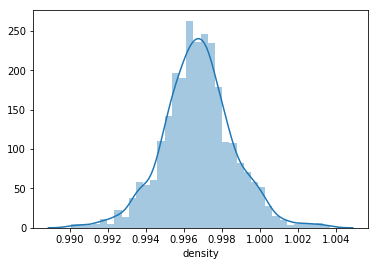

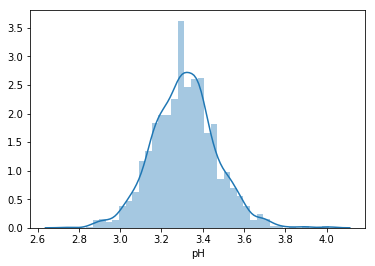

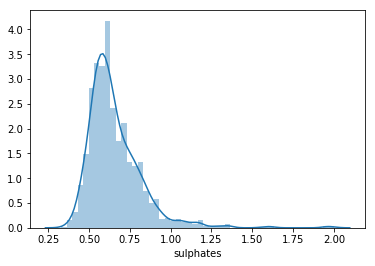

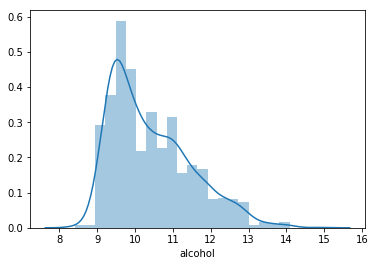

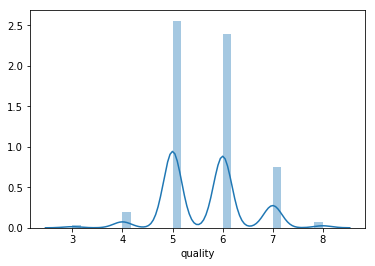

In [31]:
for feature in df.columns:
    sns.distplot(df[feature])
    plt.show()

Free sulfur dioxide , total sulfur dioxide , alcohol has skewness

It is because of outliers may be

In [32]:
from sklearn.preprocessing import power_transform
df1 = pd.DataFrame(power_transform(df),columns=df.columns)

In [33]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,-0.777467
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860,-0.777467
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,-0.777467
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,0.473370
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,-0.777467


Skewness is removed

In [34]:
data = pd.DataFrame(d)

In [37]:
quality_new = np.where(data['quality']<6,0,1)

In [38]:
df1['quality_new'] = quality_new

In [43]:
df1['quality_new'].value_counts()

1    855
0    744
Name: quality_new, dtype: int64

Created new column : quality_new 
    
where 1: is for 'Good wine'
    
0: is for 'Bad wine'
    
keeping 6 as thresold

In [41]:
df1.drop('quality',axis=1,inplace=True)

feature selection

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [46]:
df1.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.58165,-1.075025,0
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.39514,-0.500860,0


In [49]:
x = df1.drop('quality_new',axis=1)
y = df1['quality_new']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [57]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [59]:
accuracy_score(pred,y_test) # Base model is showing accuracy of 75 %

0.7518939393939394

finding best random_state

In [62]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test,y_test)*100,1)==round(accuracy_score(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test accuracy',accuracy_score(pred_test,y_test))
        print('train accuracy',accuracy_score(pred_train,y_train))
    
    

random state 53
test accuracy 0.7386363636363636
train accuracy 0.738562091503268
random state 161
test accuracy 0.7386363636363636
train accuracy 0.7394957983193278
random state 226
test accuracy 0.75
train accuracy 0.7497665732959851
random state 230
test accuracy 0.7462121212121212
train accuracy 0.746031746031746
random state 459
test accuracy 0.7424242424242424
train accuracy 0.742296918767507
random state 557
test accuracy 0.7481060606060606
train accuracy 0.7478991596638656
random state 591
test accuracy 0.7481060606060606
train accuracy 0.7478991596638656
random state 632
test accuracy 0.7424242424242424
train accuracy 0.742296918767507
random state 633
test accuracy 0.7481060606060606
train accuracy 0.7478991596638656
random state 782
test accuracy 0.7424242424242424
train accuracy 0.742296918767507
random state 876
test accuracy 0.740530303030303
train accuracy 0.7413632119514473
random state 929
test accuracy 0.7386363636363636
train accuracy 0.738562091503268
random state 9

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=591)

# Feature Selection

In [64]:
from sklearn.feature_selection import RFE

In [70]:
rfe = RFE(estimator=lr,step=1)
rfe = rfe.fit(x_train,y_train)
selected_feature = pd.DataFrame({'features':list(x_train.columns),'ranking':rfe.ranking_})

In [71]:
selected_feature.sort_values(by='ranking',ascending=True)

,features,ranking
0,fixed acidity,1
1,volatile acidity,1
2,citric acid,1
9,sulphates,1
10,alcohol,1
7,density,2
4,chlorides,3
6,total sulfur dioxide,4
3,residual sugar,5
5,free sulfur dioxide,6


fixed acidity , volatile acidity , citric acid , sulphate , alcohol  are significant features

pH is least significant feature

In [72]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [73]:
rfe_model = lr.fit(x_train_rfe,y_train)

In [77]:
 p = rfe_model.predict(x_test_rfe)

In [78]:
accuracy_score(p,y_test)

0.7424242424242424

 accuracy score of rfe_model is 74%  , accuracy of previous model was 76 % may be  because of overfitting

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
pred_dtc = dtc.predict(x_test)

In [106]:
confusion_matrix(pred_dtc,y_test)

array([[197,  70],
       [ 55, 206]], dtype=int64)

In [107]:
accuracy_score(pred_dtc,y_test)

0.7632575757575758

Applying hyper parametric tuning 

In [87]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion':['gini','entropy']
}
gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [93]:
best_p = gd_sr.best_params_

In [94]:
best_p

{'criterion': 'entropy'}

In [95]:
best_res = gd_sr.best_score_      
print(best_res)

0.6353918495297806


In [109]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [110]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))

0.7518939393939394


In [111]:
k_neighbors =  KNeighborsClassifier()
k_neighbors.fit(x_train,y_train)
p2 = k_neighbors.predict(x_test)
print(accuracy_score(y_test,p2))

0.7026515151515151


In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
list_algo = [KNeighborsClassifier,SVC,DecisionTreeClassifier,LogisticRegression]
for i in list_algo:
    obj = i()
    cross_score = cross_val_score(obj,x,y,cv=5)
    print(i,cross_score.mean())
    

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 0.6879231974921629
<class 'sklearn.svm._classes.SVC'> 0.7260736677115986
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.634739420062696
<class 'sklearn.linear_model._logistic.LogisticRegression'> 0.7192104231974922


Algorithm giving least difference betweeen actual and cross_score is kneighbors

Trying ensemble technique

In [85]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
p2 = rfc.predict(x_test)
print(accuracy_score(y_test,p2))

0.7992424242424242


In [123]:
cross_score = cross_val_score(rfc,x,y,cv=5)
cross_score.mean()

0.7173295454545455

Saving best model

In [125]:
import pickle
red_wine_file = 'pickl.pkl'
pickle.dump(k_neighbors ,open(red_wine_file,'wb'))